In [1]:
import numpy as np
import pandas as pd 
from datetime import datetime as time
from matplotlib import pyplot as plt
from matplotlib import dates as mdates

In [2]:
data = pd.read_csv("data/BTC-USD.csv")

In [3]:
display = None
pd.set_option('display.max_columns', display)
pd.set_option('display.max_rows', display)

In [4]:
p=14

dm_df=pd.DataFrame()
tr_df=pd.DataFrame()

dm_df['Date']=data['Date']
tr_df['Date']=data['Date']

In [5]:
def FuncionRMA(values,period): #FUNCIONA
    values=pd.Series(values)
    k=1/period
    result=pd.DataFrame()
    array=[]
    result['RMA']=values.rolling(window=period).mean()
    for i in range(len(values)):
        if(i>period-1):
            result['RMA'][i]=(k*values[i]) + ((1-k)* result['RMA'][i-1])
        else:    
            continue
    
    return np.array(result['RMA'])

def FuncionRMA2(values,periodo, adx): #FUNCIONA
    if (adx==False):
        long_data=periodo
    else:
        long_data=(periodo*2)-1
    
    values=pd.Series(values)
    k=1/periodo
    result=pd.DataFrame()
    array=[]
    array=np.array(values.iloc[:long_data].rolling(window=periodo).mean())
    for i in range(len(values)):
        if(i>=long_data):
            op=(k*values[i]) + ((1-k)* array[i-1])
            array = np.append(array,op)

        else:    
            continue
    result['RMA2']=pd.Series(array)

    return array

In [6]:
def FuncionEMA(values, period):
    values=pd.Series(values)
    result=pd.DataFrame()
    result['EMA'] = values.ewm(span=period, adjust=False).mean()
    
    return result['EMA']

In [7]:
def Calc_TR(dt):
    A=[]
    B=[]
    C=[]
    TR=[]
    
    for i in range(len(dt)):
        uno=dt['High'][i]-dt['Low'][i]
        
        if(i>0):
            dos=np.abs(dt['High'][i]-dt['Close'][i-1])
            tres=np.abs(dt['Low'][i]-dt['Close'][i-1])

        else:
            dos=0
            tres=0
        
        A.append(uno)
        B.append(dos)
        C.append(tres)
        
        TR.append(np.amax([uno,dos,tres]))
    
    tr_df['uno'] = pd.Series(A)
    tr_df['dos'] = pd.Series(B)
    tr_df['tres'] = pd.Series(C)
    tr_df['tr'] = pd.Series(TR)
        
    return TR

In [8]:
# tr_df

No handles with labels found to put in legend.


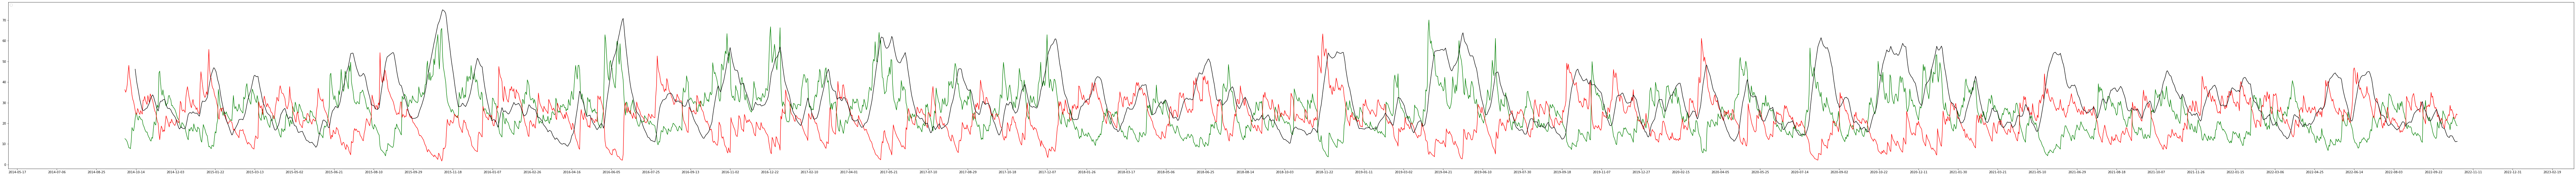

In [9]:
def Calc_DMs(dt):
    PDM=[]
    NDM=[]
    
    for i in range(len(dt)):
    
        if(i>0):
            A=dt['High'][i]-dt['High'][i-1]
            B=dt['Low'][i-1]-dt['Low'][i]

            if(0<A>B):
                PDM.append(A)
                NDM.append(0)
            elif(0<B>A):
                NDM.append(B)
                PDM.append(0)    
            else:
                PDM.append(0)
                NDM.append(0)
        else:
            PDM.append(0)
            NDM.append(0)
        
    dm_df['+DM'] = pd.Series(PDM)
    dm_df['-DM'] = pd.Series(NDM)
    
    return PDM,NDM

def Calc_Exps(dt):
    PDM,NDM=Calc_DMs(dt)
    TR = Calc_TR(dt)
    
    EPDM=FuncionRMA2(PDM,p,False)
    ENDM=FuncionRMA2(NDM,p,False)
    ATR=FuncionRMA2(TR,p,False)
    
    tr_df['ATR14'] = pd.Series(ATR)
    
    dm_df['+DM14'] = pd.Series(EPDM)
    dm_df['-DM14'] = pd.Series(ENDM)
    
    return EPDM, ENDM, ATR

def Calc_DIs(dt):
    EPDM, ENDM, ATR = Calc_Exps(dt)
    
    PDI=(EPDM/ATR)*100
    NDI=(ENDM/ATR)*100
    
    dm_df['+DI'] = pd.Series(PDI)
    dm_df['-DI'] = pd.Series(NDI)  
    
    return PDI, NDI

def Calc_DXs(dt):
    PDI, NDI = Calc_DIs(dt)
    
    DX = 100*(np.abs(PDI-NDI)/np.abs(PDI+NDI))
    
    dm_df['DX'] = pd.Series(DX)
    
    return DX

def ADX(dt):
    DX = Calc_DXs(dt)
    ADX = FuncionRMA2(DX,p,True)
    
    return pd.Series(ADX)
    
dm_df['ADX']=ADX(data)


    
plt.figure(figsize=(150,10))

intervalo=50
dates = data['Date']
x_values = [time.strptime(d, "%Y-%m-%d").date() for d in dates]

ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator(interval=intervalo)
ax.xaxis.set_major_locator(locator)

plt.plot(x_values, dm_df['+DI'], color='g')
plt.plot(x_values, dm_df['-DI'], color='r')

# plt.plot(x_values, dm_df['DX'], color='b', alpha=0.5)
plt.plot(x_values, dm_df['ADX'], color='k')

plt.legend(loc='upper left')
plt.show()

In [10]:
dm_df[dm_df['Date']=='2017-12-07']

,Date,+DM,-DM,+DM14,-DM14,+DI,-DI,DX,ADX
1177,2017-12-07,3530.59961,0.0,644.686705,45.664622,62.956091,4.459323,86.770614,50.575349
